In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer,RobustScaler
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import svm
from ydata_profiling import ProfileReport
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,VotingRegressor,StackingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error


# Preprocessing

In [2]:
df=pd.read_csv('car.csv')
df=df.drop(['Unnamed: 0','currency','vehicle_engine'],axis=1)
df['description']=df['description'].str.split(' ',n=1).str[1]
df['model']=df['description'].str.extract(r'(\w+)') 
df['mileage_from_odometer']=df['mileage_from_odometer'].str.replace(',','')
df['mileage_from_odometer']=df['mileage_from_odometer'].str.extract(r'(\d+)').astype(int)
df['price']=df['price'].astype(int)
df=df.drop(['description','manufacturer'],axis=1) 
df=df.drop_duplicates()

In [3]:

df['model_date']=df['model_date'].astype(int)
df['price']=df['price'].astype(int)
df['mileage_from_odometer']=df['mileage_from_odometer'].astype(int)

df.head()

,brand,fuel_type,item_condition,mileage_from_odometer,model_date,price,vehicle_transmission,model
0,MG,Petrol,used,6000,2021,6525000,Automatic,HS
1,Toyota,Petrol,used,68000,2012,1625000,Manual,Aygo
2,Honda,Petrol,used,150000,2015,2550000,Automatic,City
3,KIA,Petrol,used,18000,2022,9000000,Automatic,Sorento
4,Toyota,Petrol,used,110000,2015,3350000,Automatic,Corolla


# EDA

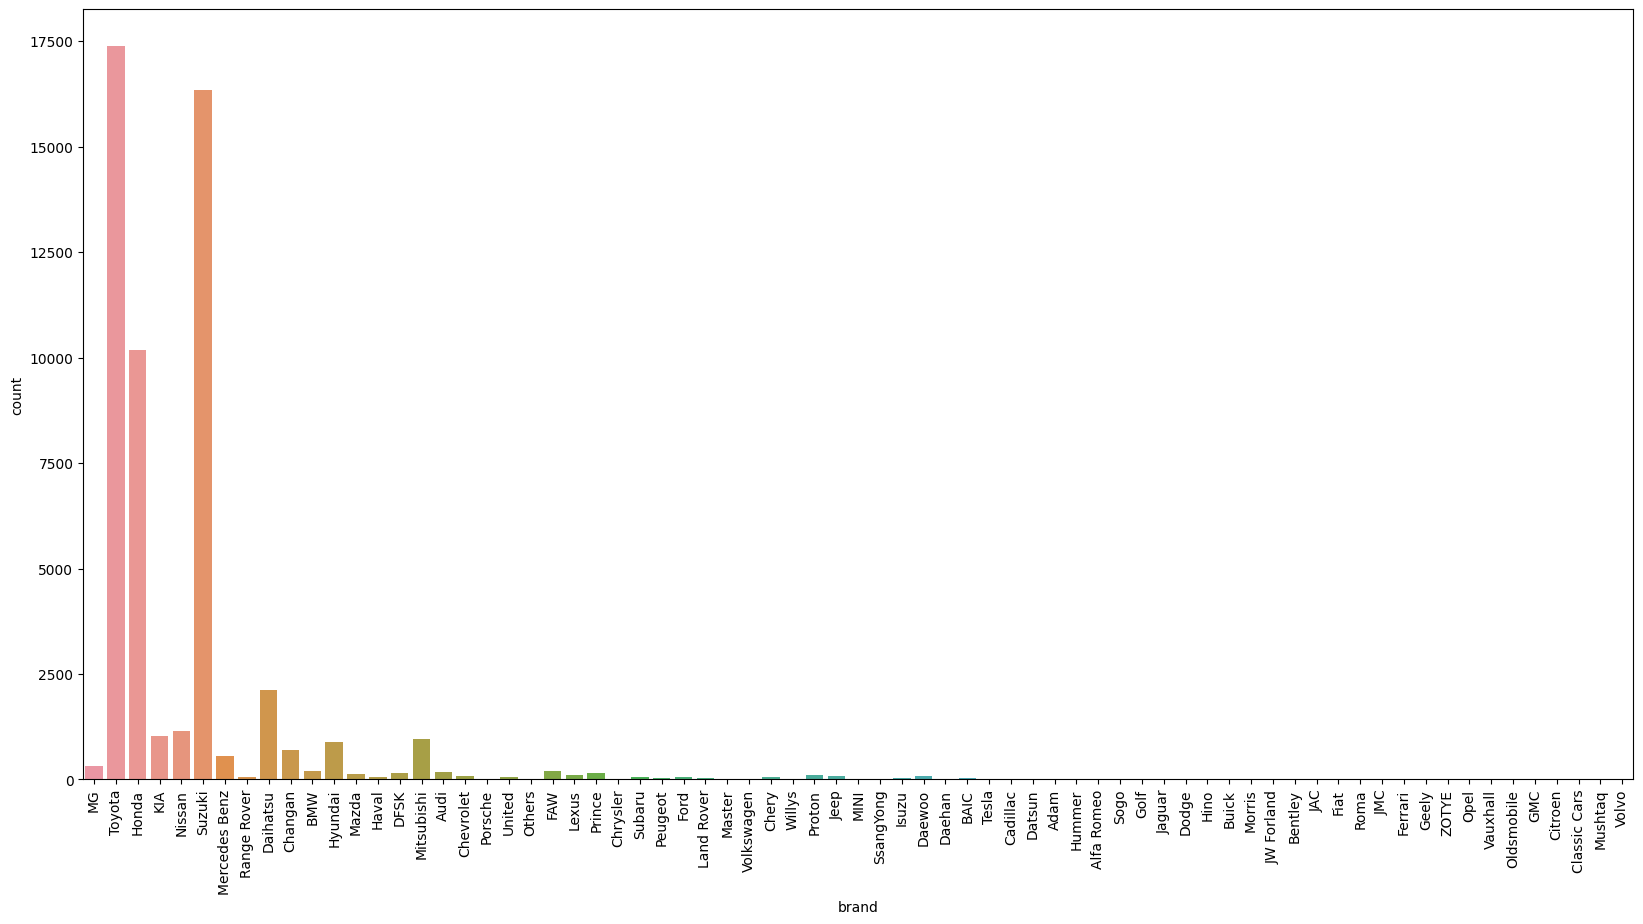

In [4]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='brand')
plt.xticks(rotation=90)
plt.show()
#conclusion toyota is the most common brand which is bought by people and then suzuki

In [5]:
cor=df[['mileage_from_odometer','model_date','price']].corr()

<AxesSubplot: >

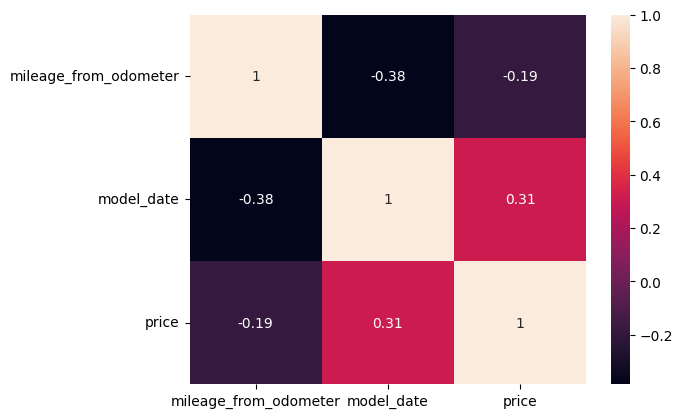

In [6]:
sns.heatmap(cor,annot=True)

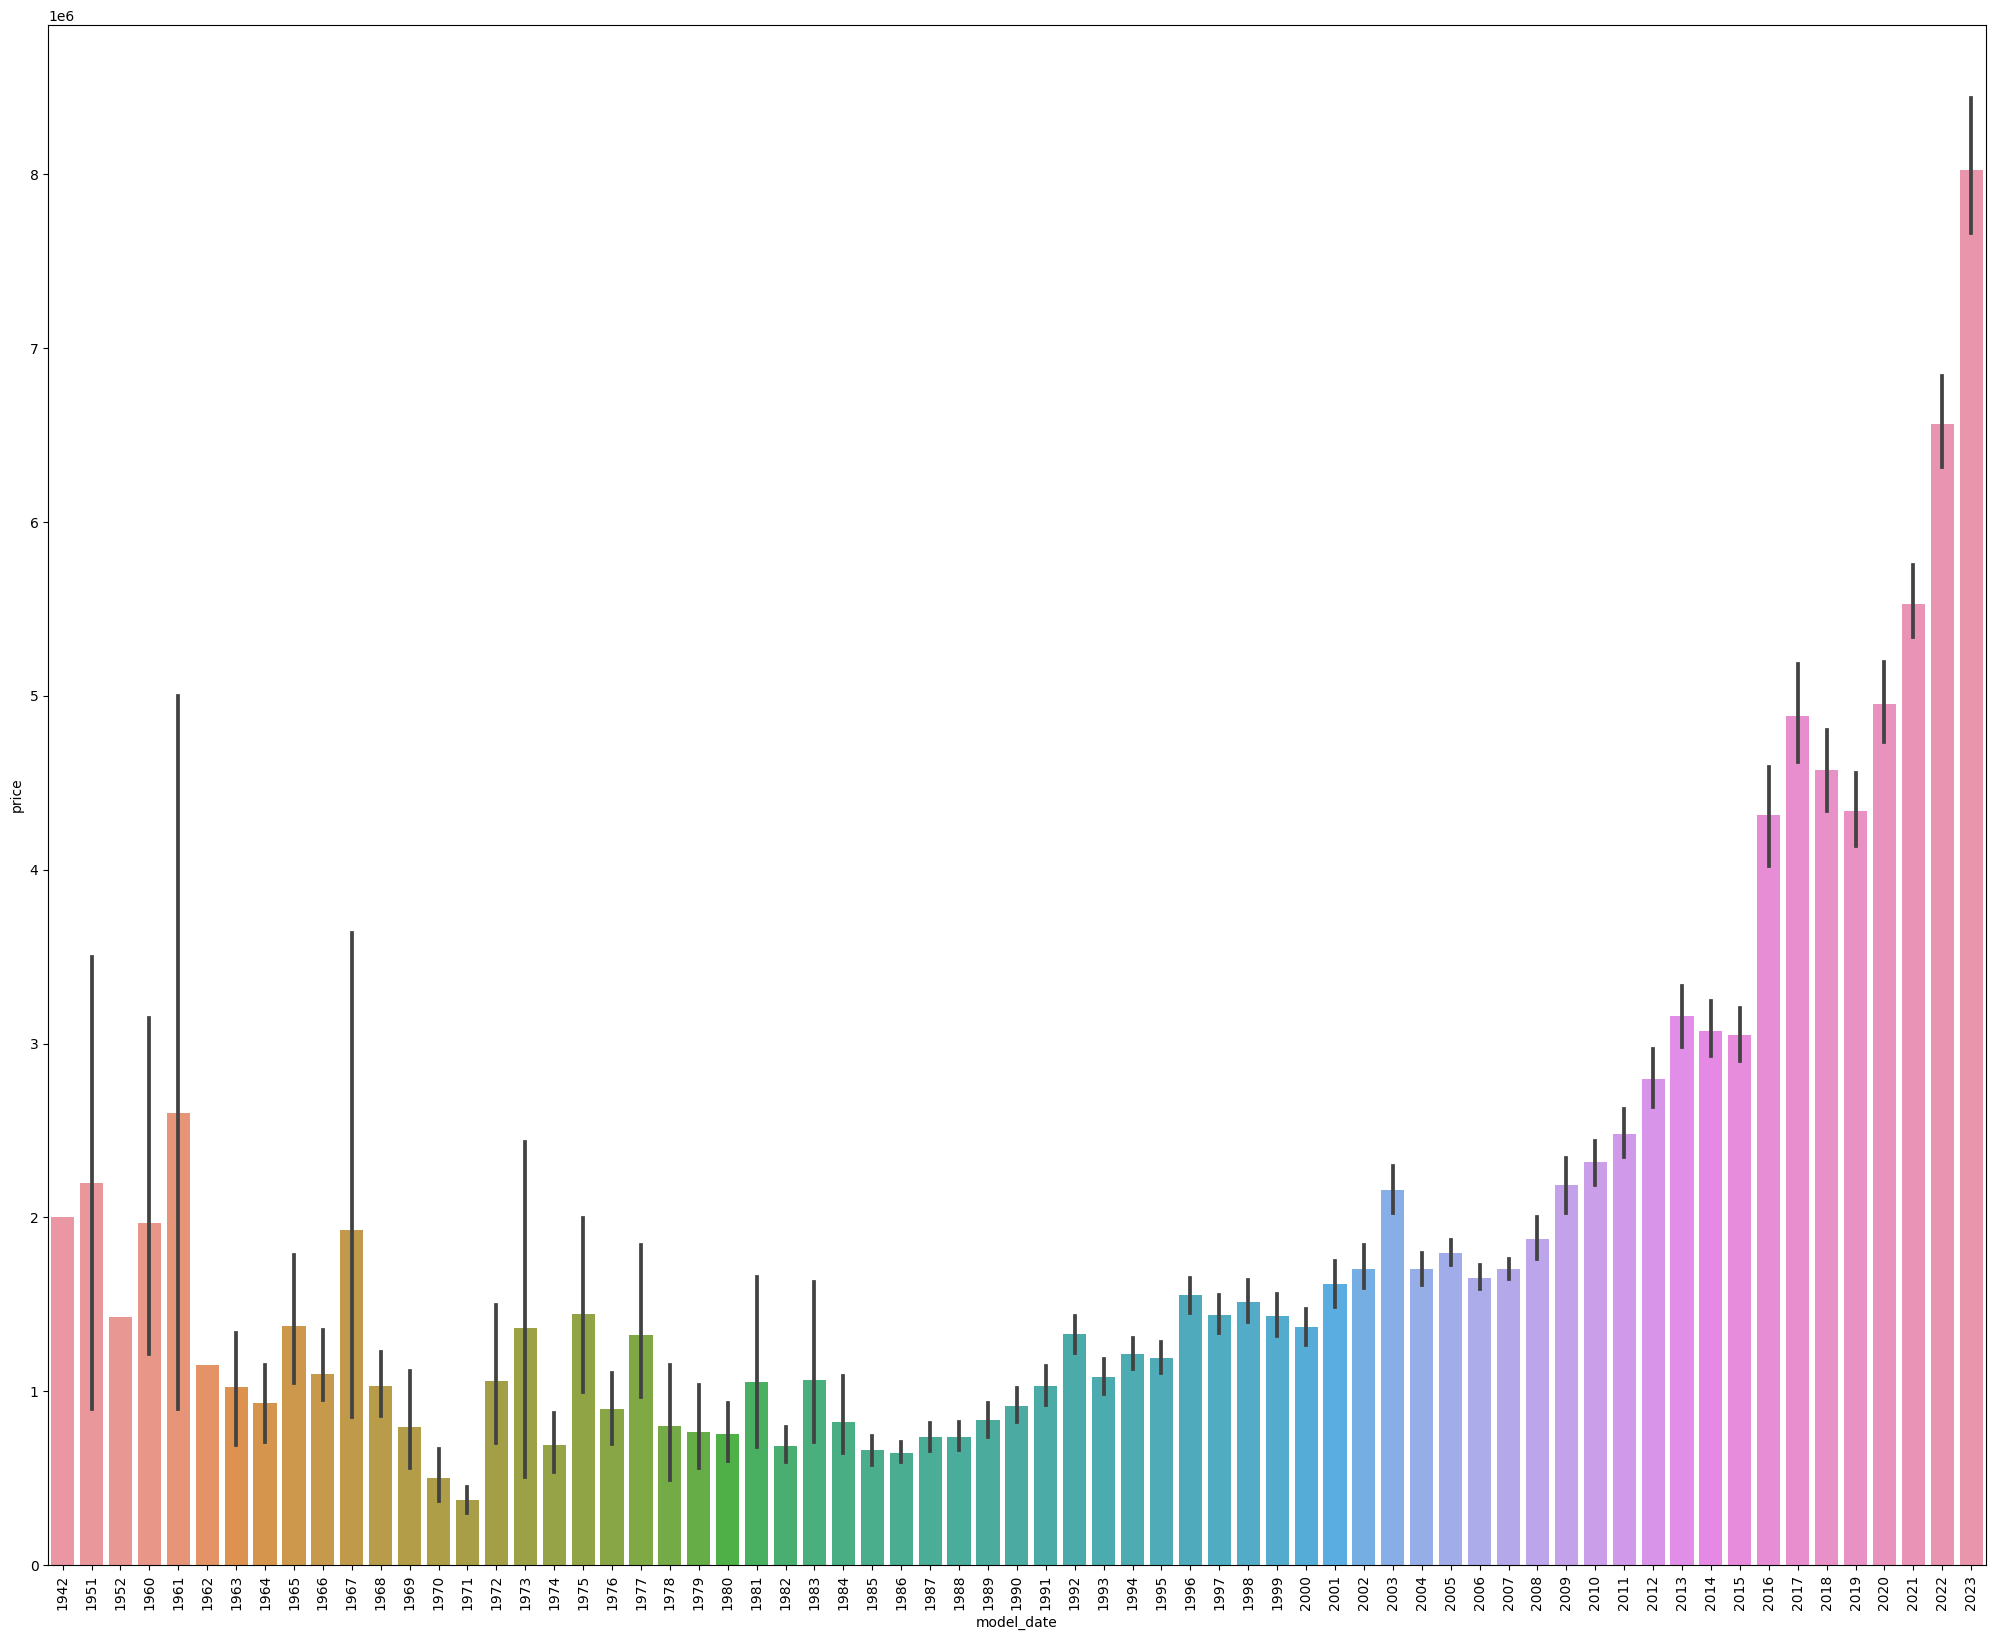

In [7]:
plt.figure(figsize=(25,20))
sns.barplot(data=df,x='model_date',y='price')
plt.xticks(rotation=90)
plt.show()
#conclusion models manufactured in 2023 are the most expensive

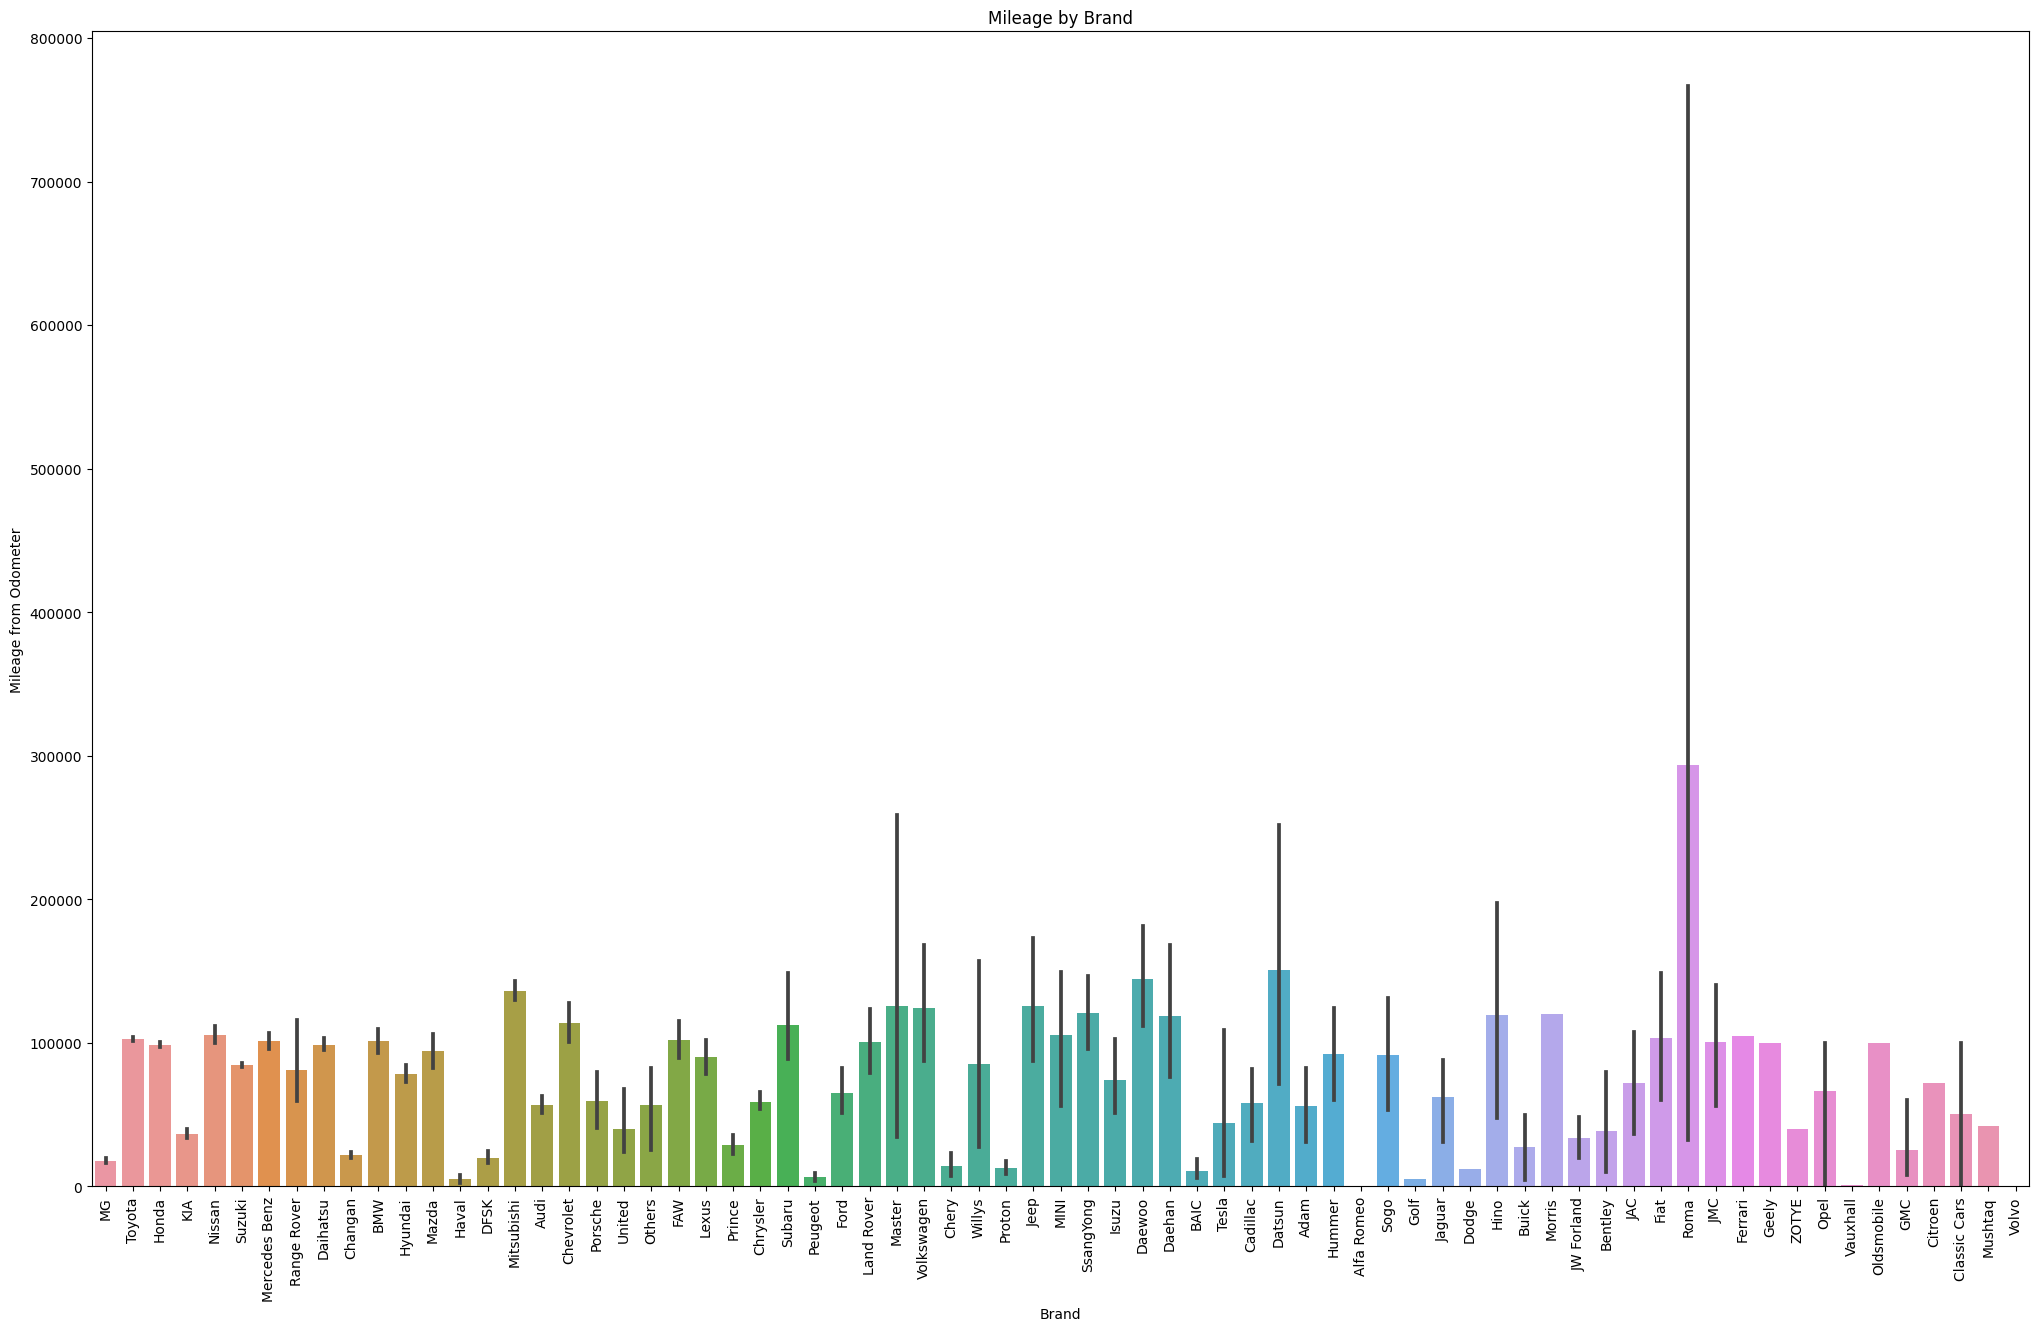

In [8]:
plt.figure(figsize=(25, 15))
sns.barplot(data=df, x='brand', y='mileage_from_odometer')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Mileage from Odometer')
plt.title('Mileage by Brand')
plt.show()
#conculsion  roma brand is the most sold brand

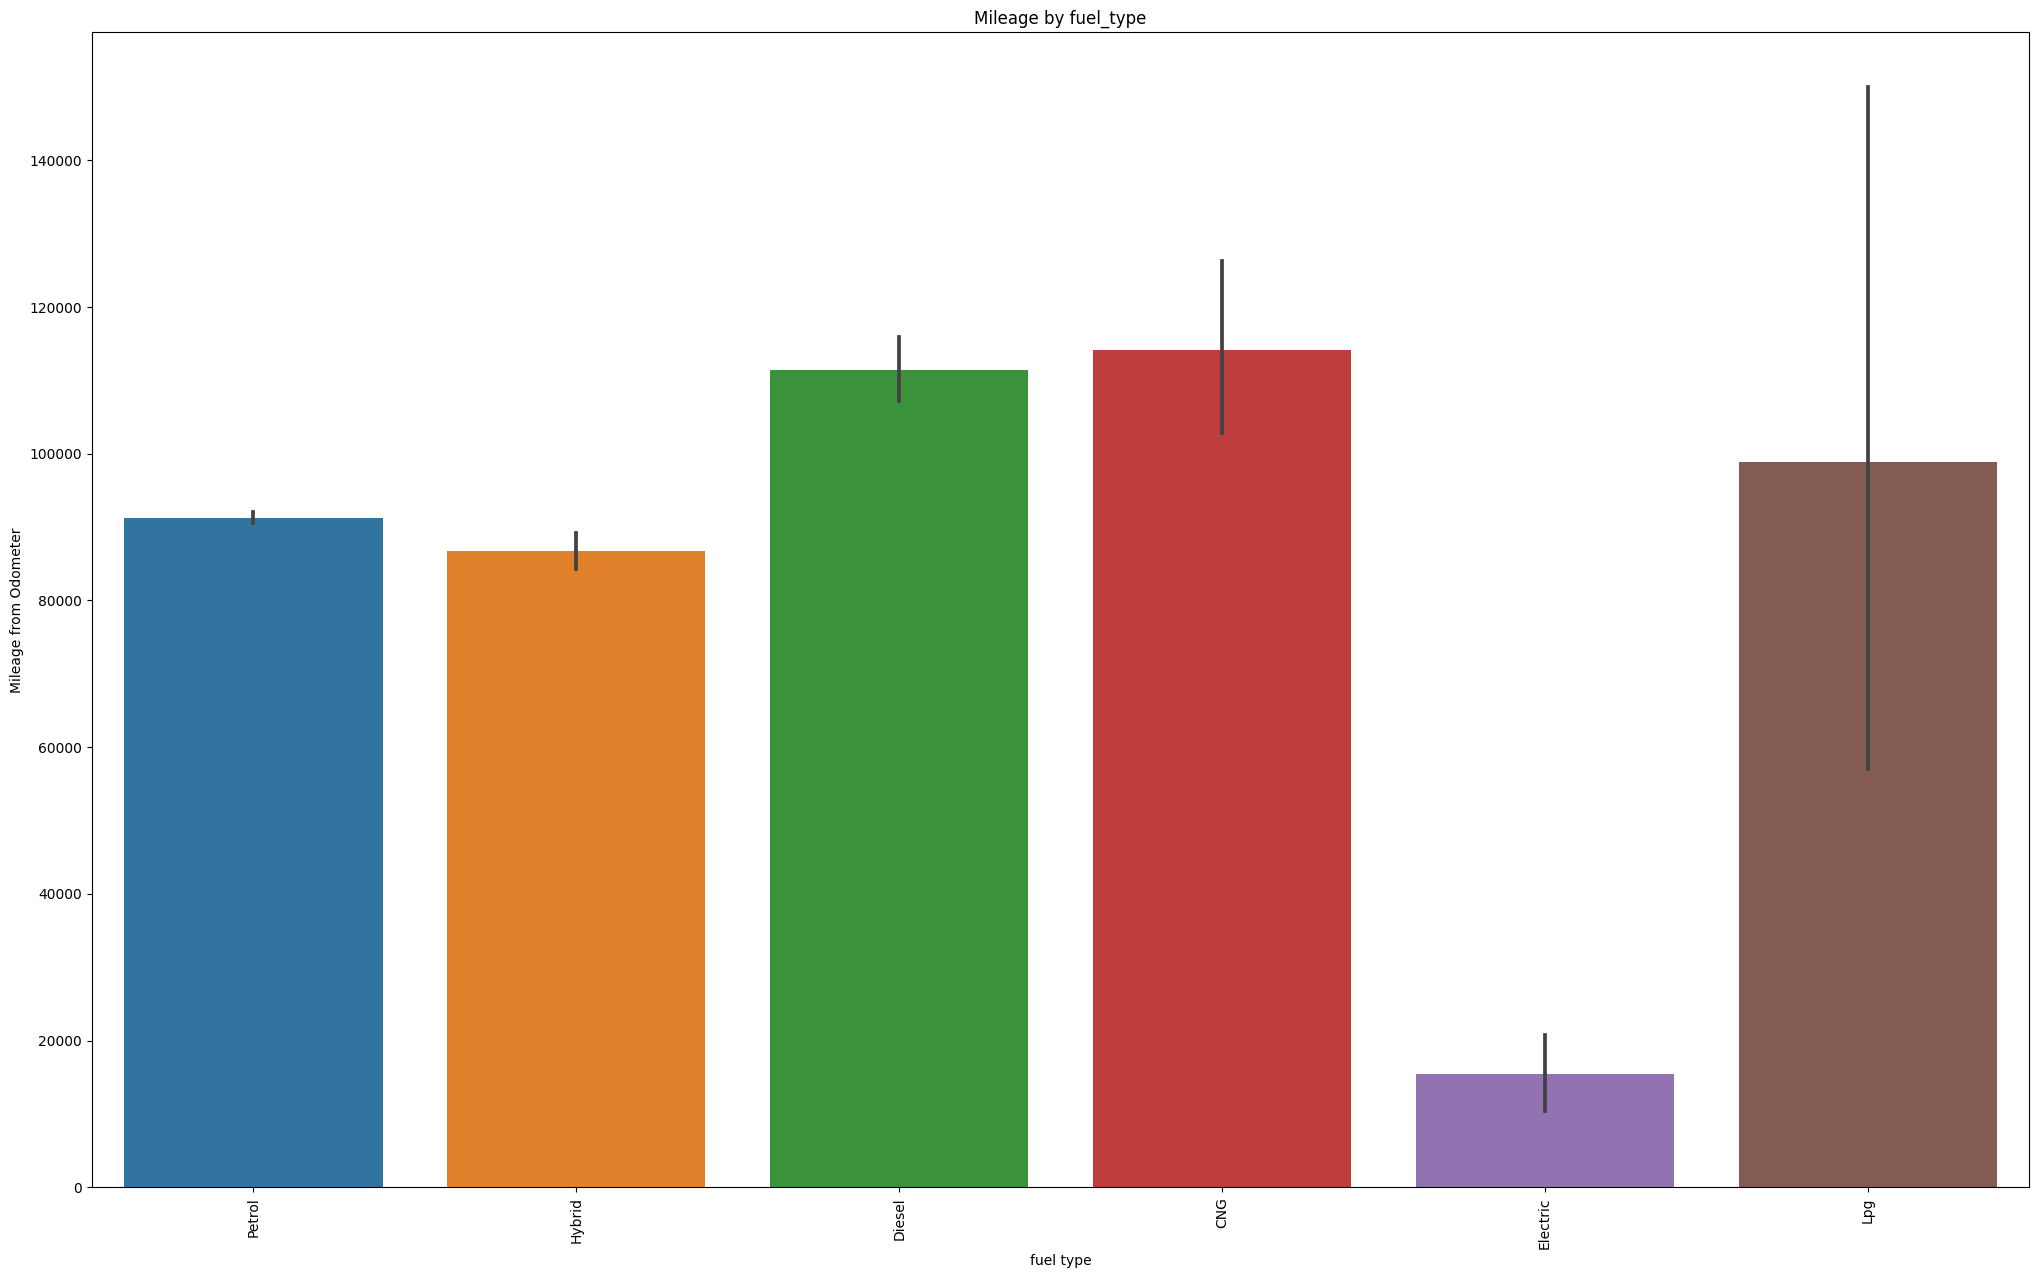

In [9]:
plt.figure(figsize=(25, 15))
sns.barplot(data=df, x='fuel_type', y='mileage_from_odometer')
plt.xticks(rotation=90)
plt.xlabel('fuel type')
plt.ylabel('Mileage from Odometer')
plt.title('Mileage by fuel_type')
plt.show()
#conclusion cng has the highest mileage

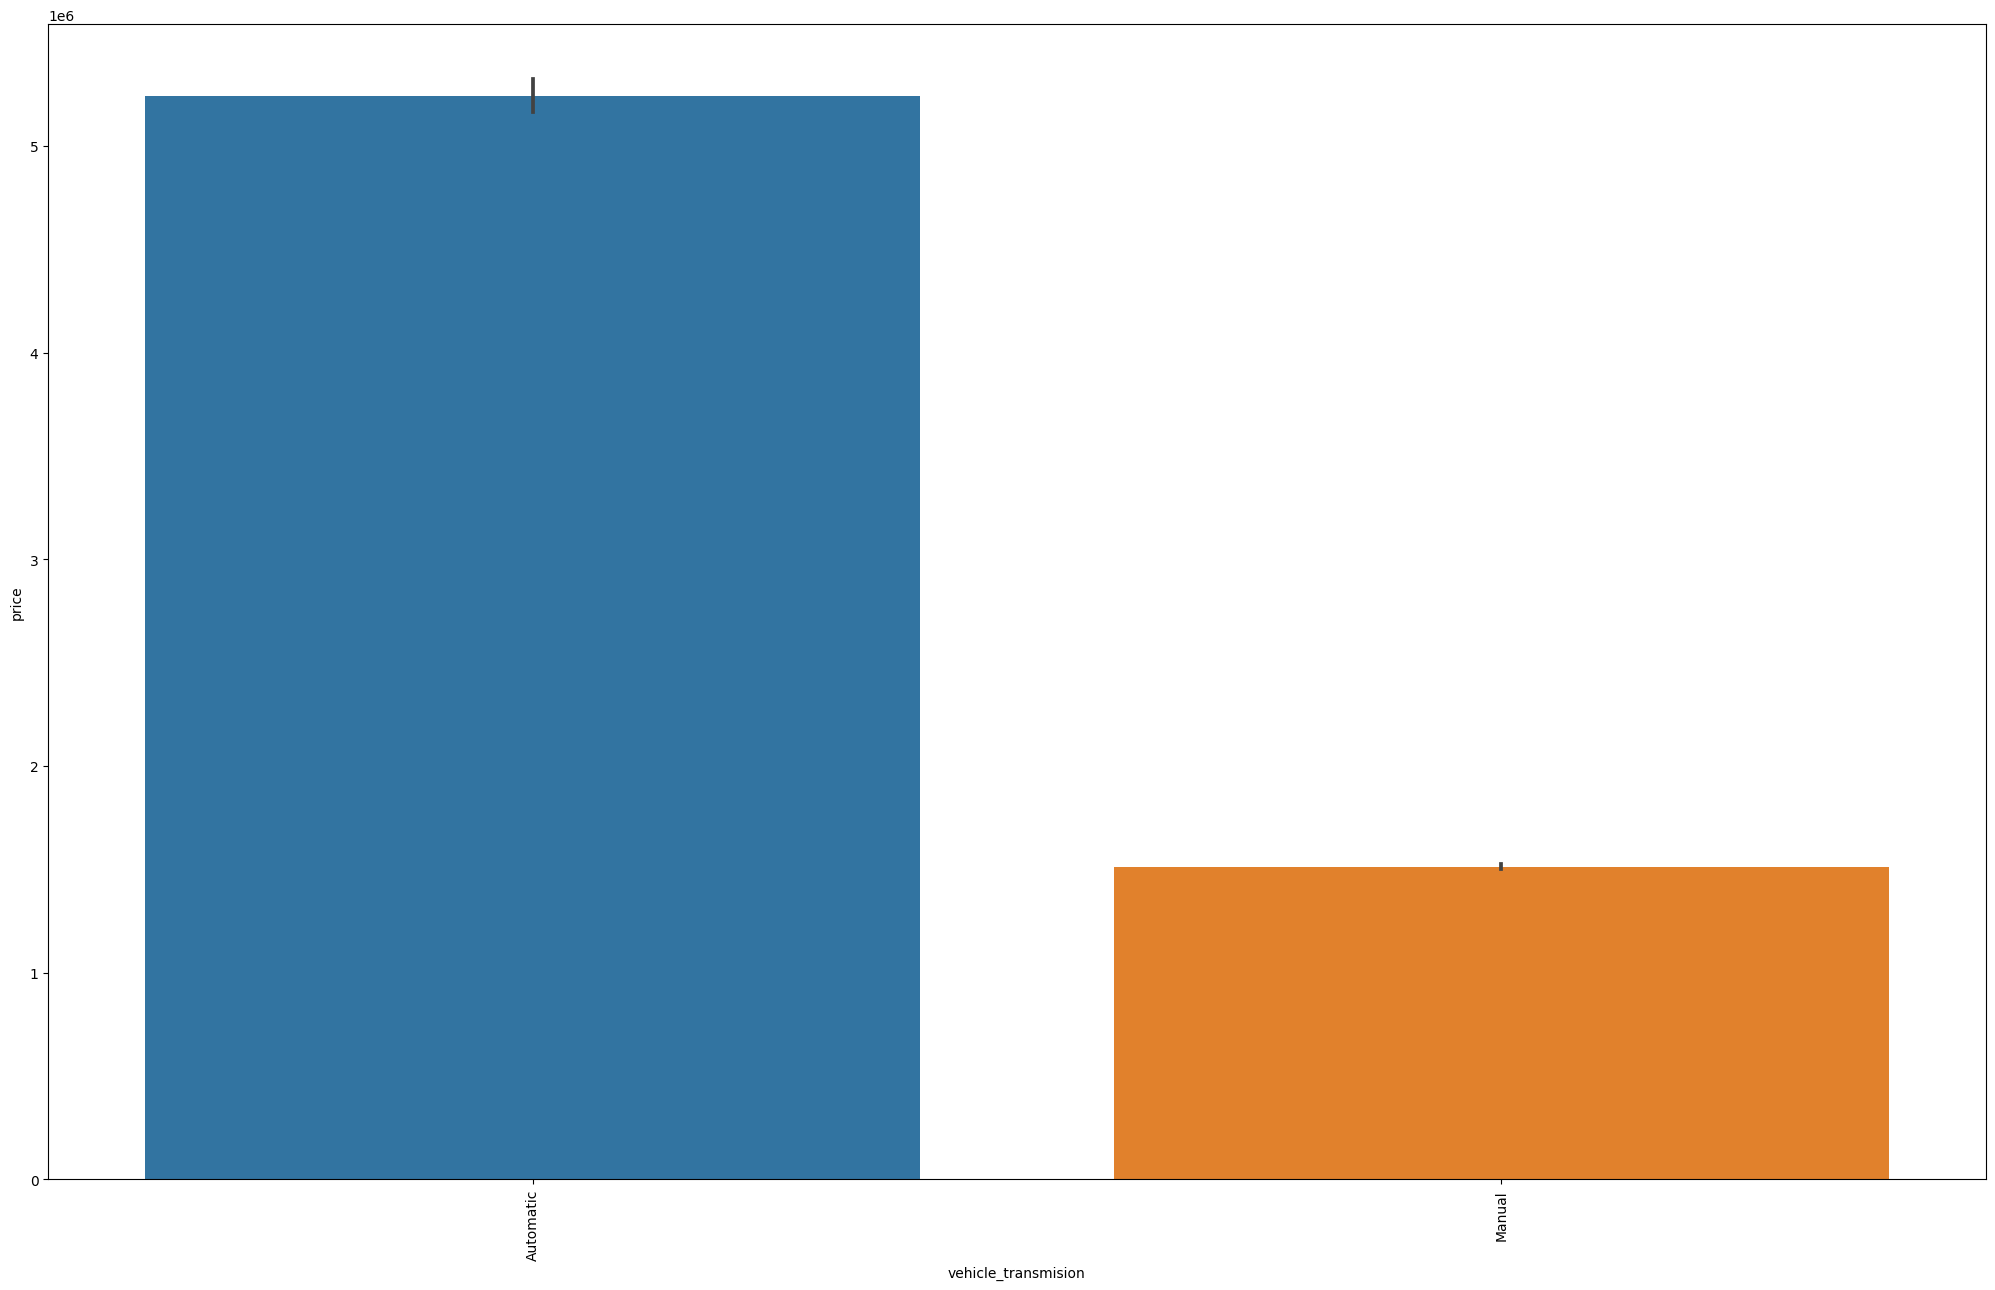

In [10]:
plt.figure(figsize=(25, 15))
sns.barplot(data=df, x='vehicle_transmission', y='price')
plt.xticks(rotation=90)
plt.xlabel('vehicle_transmision')
plt.ylabel('price')
plt.show()
#conclusion automatic cars are way more expensive then manual cars

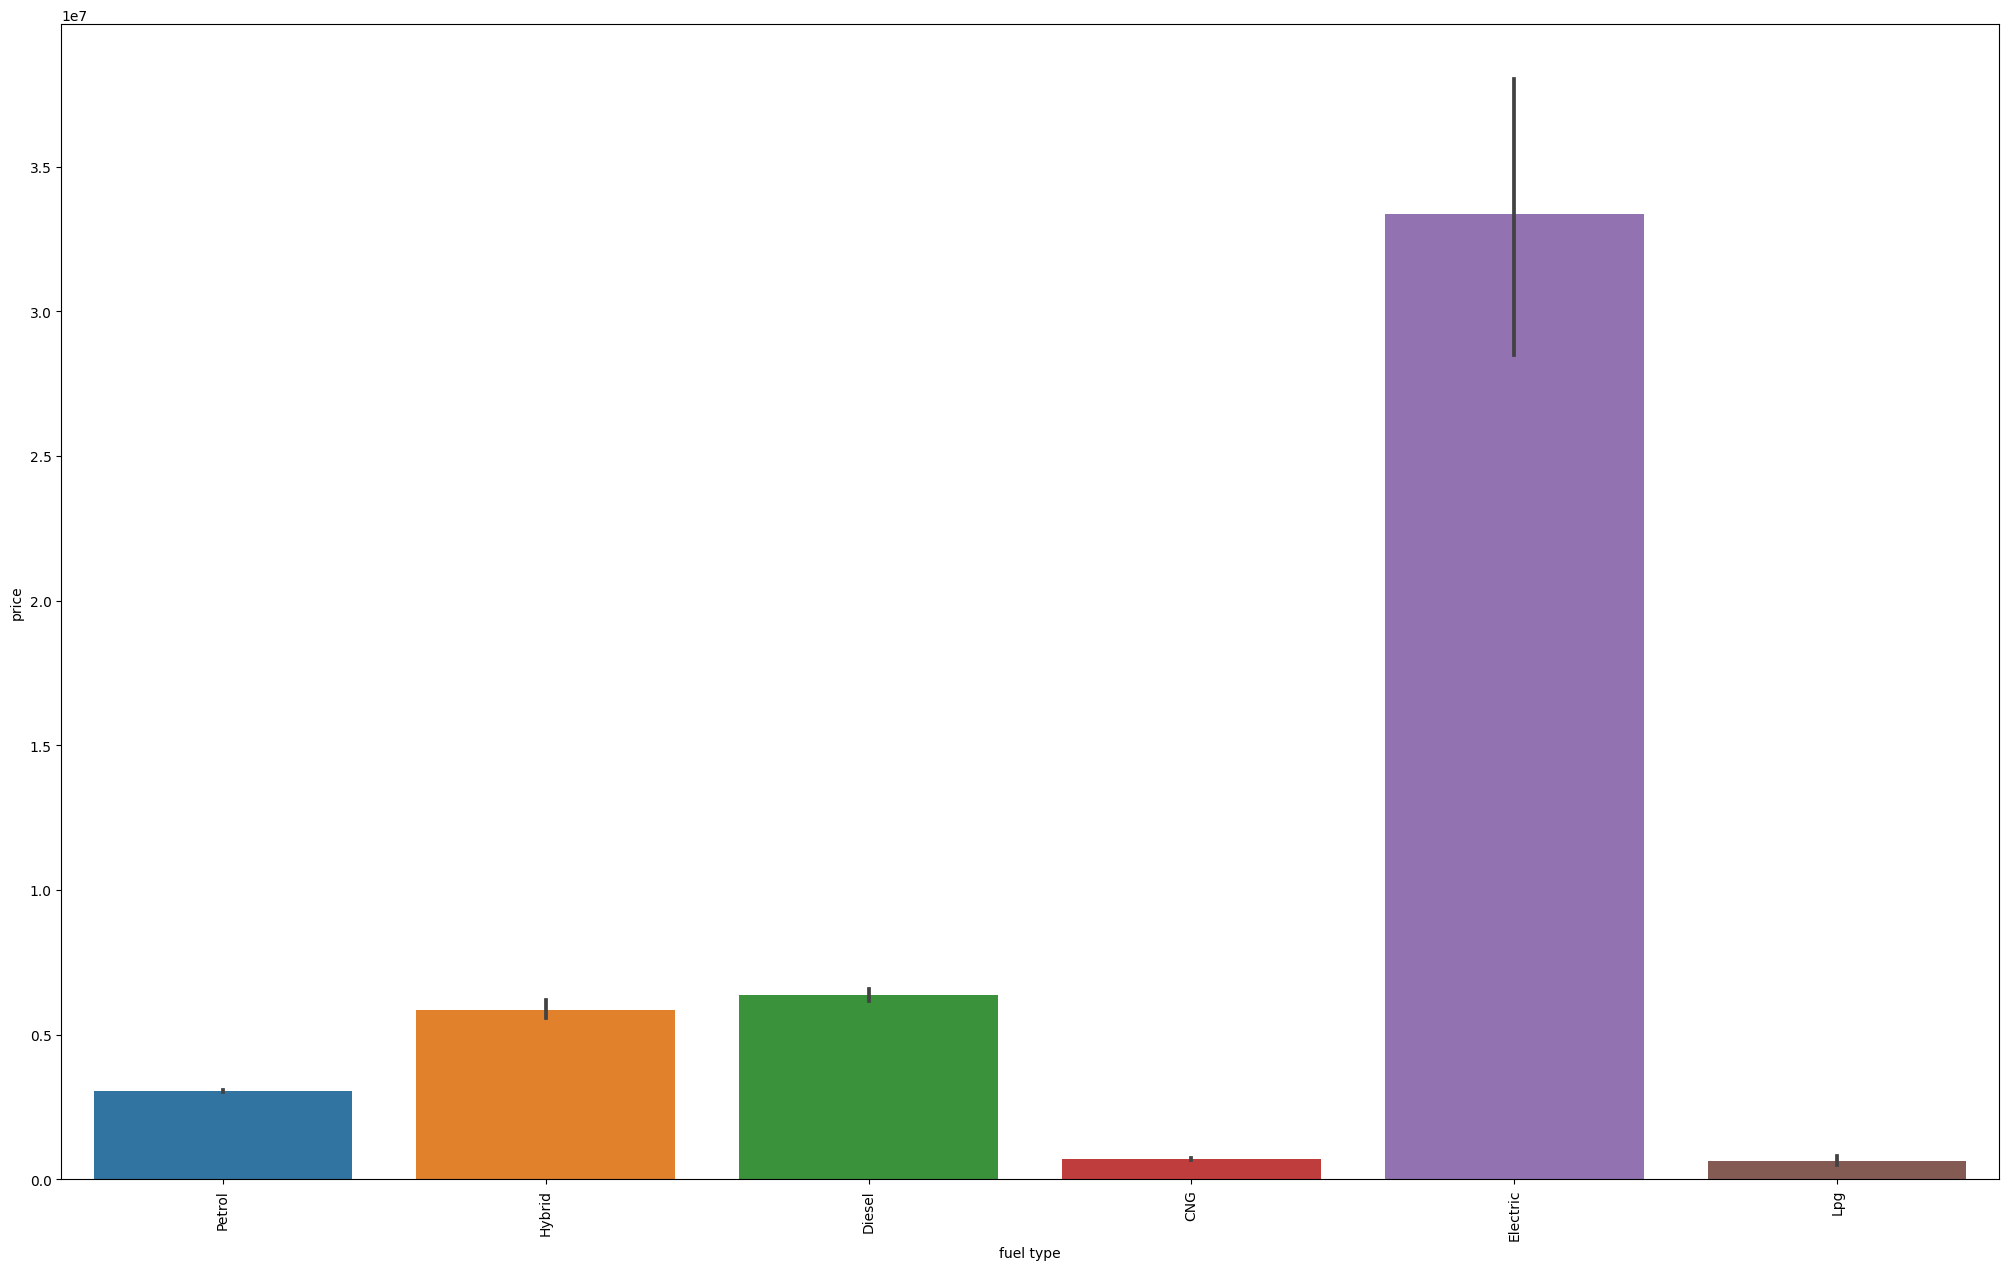

In [11]:
plt.figure(figsize=(25, 15))
sns.barplot(data=df, x='fuel_type', y='price')
plt.xticks(rotation=90)
plt.xlabel('fuel type')
plt.ylabel('price')
plt.show()
#conclusion electric cars are the most expensive where as  lpg and cng cars are the most cheap

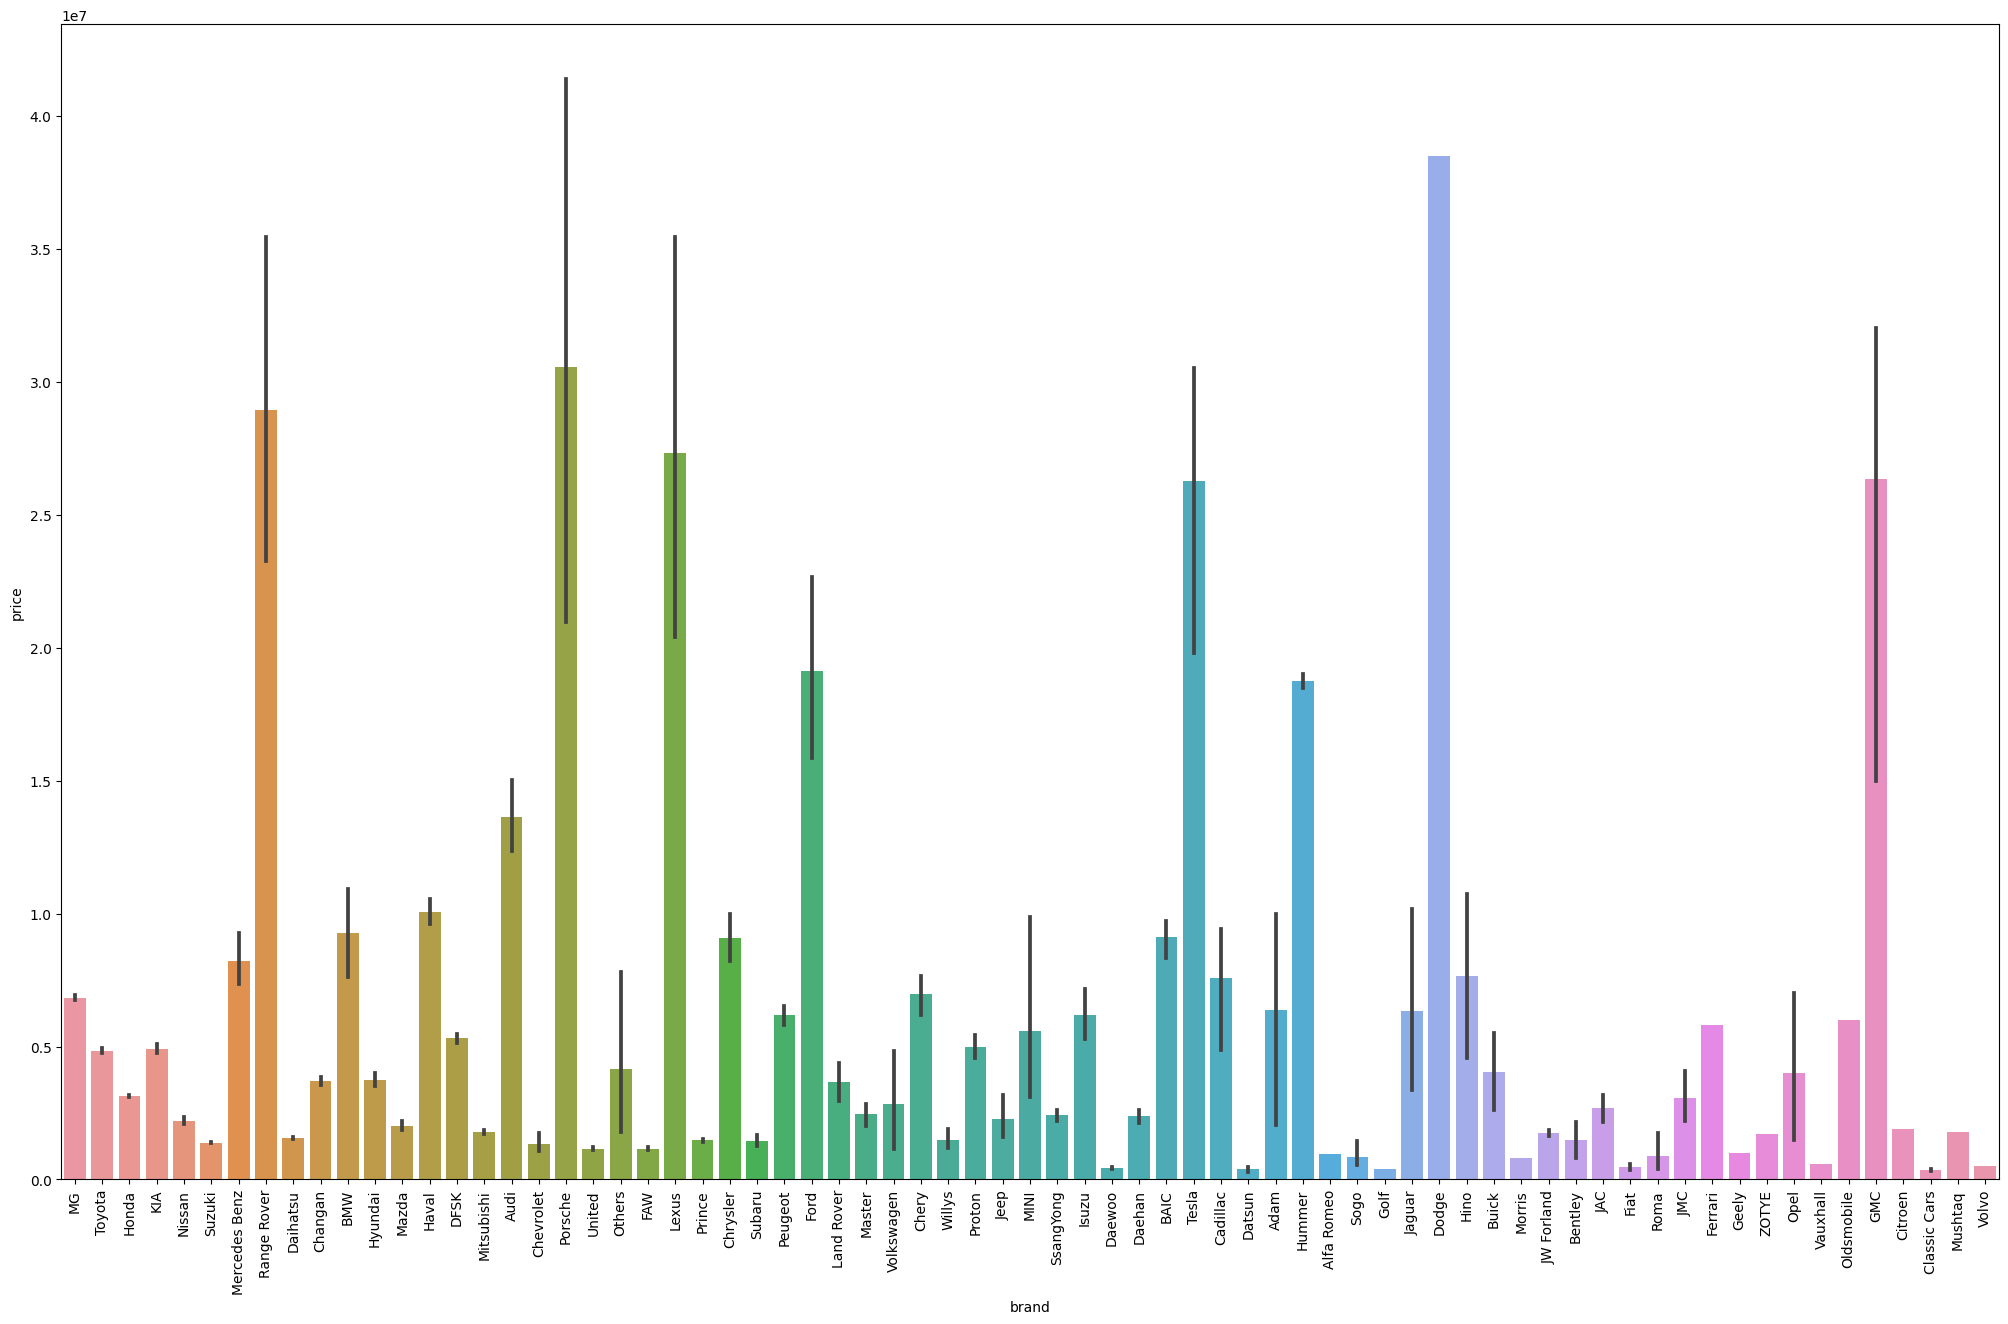

In [12]:
plt.figure(figsize=(25, 15))
sns.barplot(data=df, x='brand', y='price')
plt.xticks(rotation=90)
plt.xlabel('brand')
plt.ylabel('price')
plt.show()
#conclusion dodge, porche and range rover are very expensive brands

<AxesSubplot: xlabel='fuel_type', ylabel='mileage_from_odometer'>

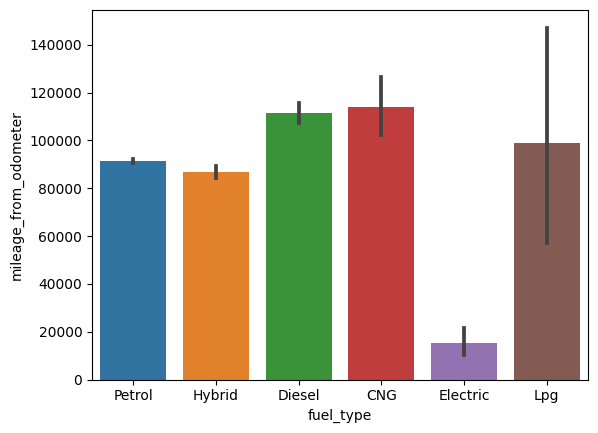

In [13]:
sns.barplot(data=df,x='fuel_type',y='mileage_from_odometer')
#conclusion cars with cng have the highest kms driven value meaning cng cars  are older and electric cars are new

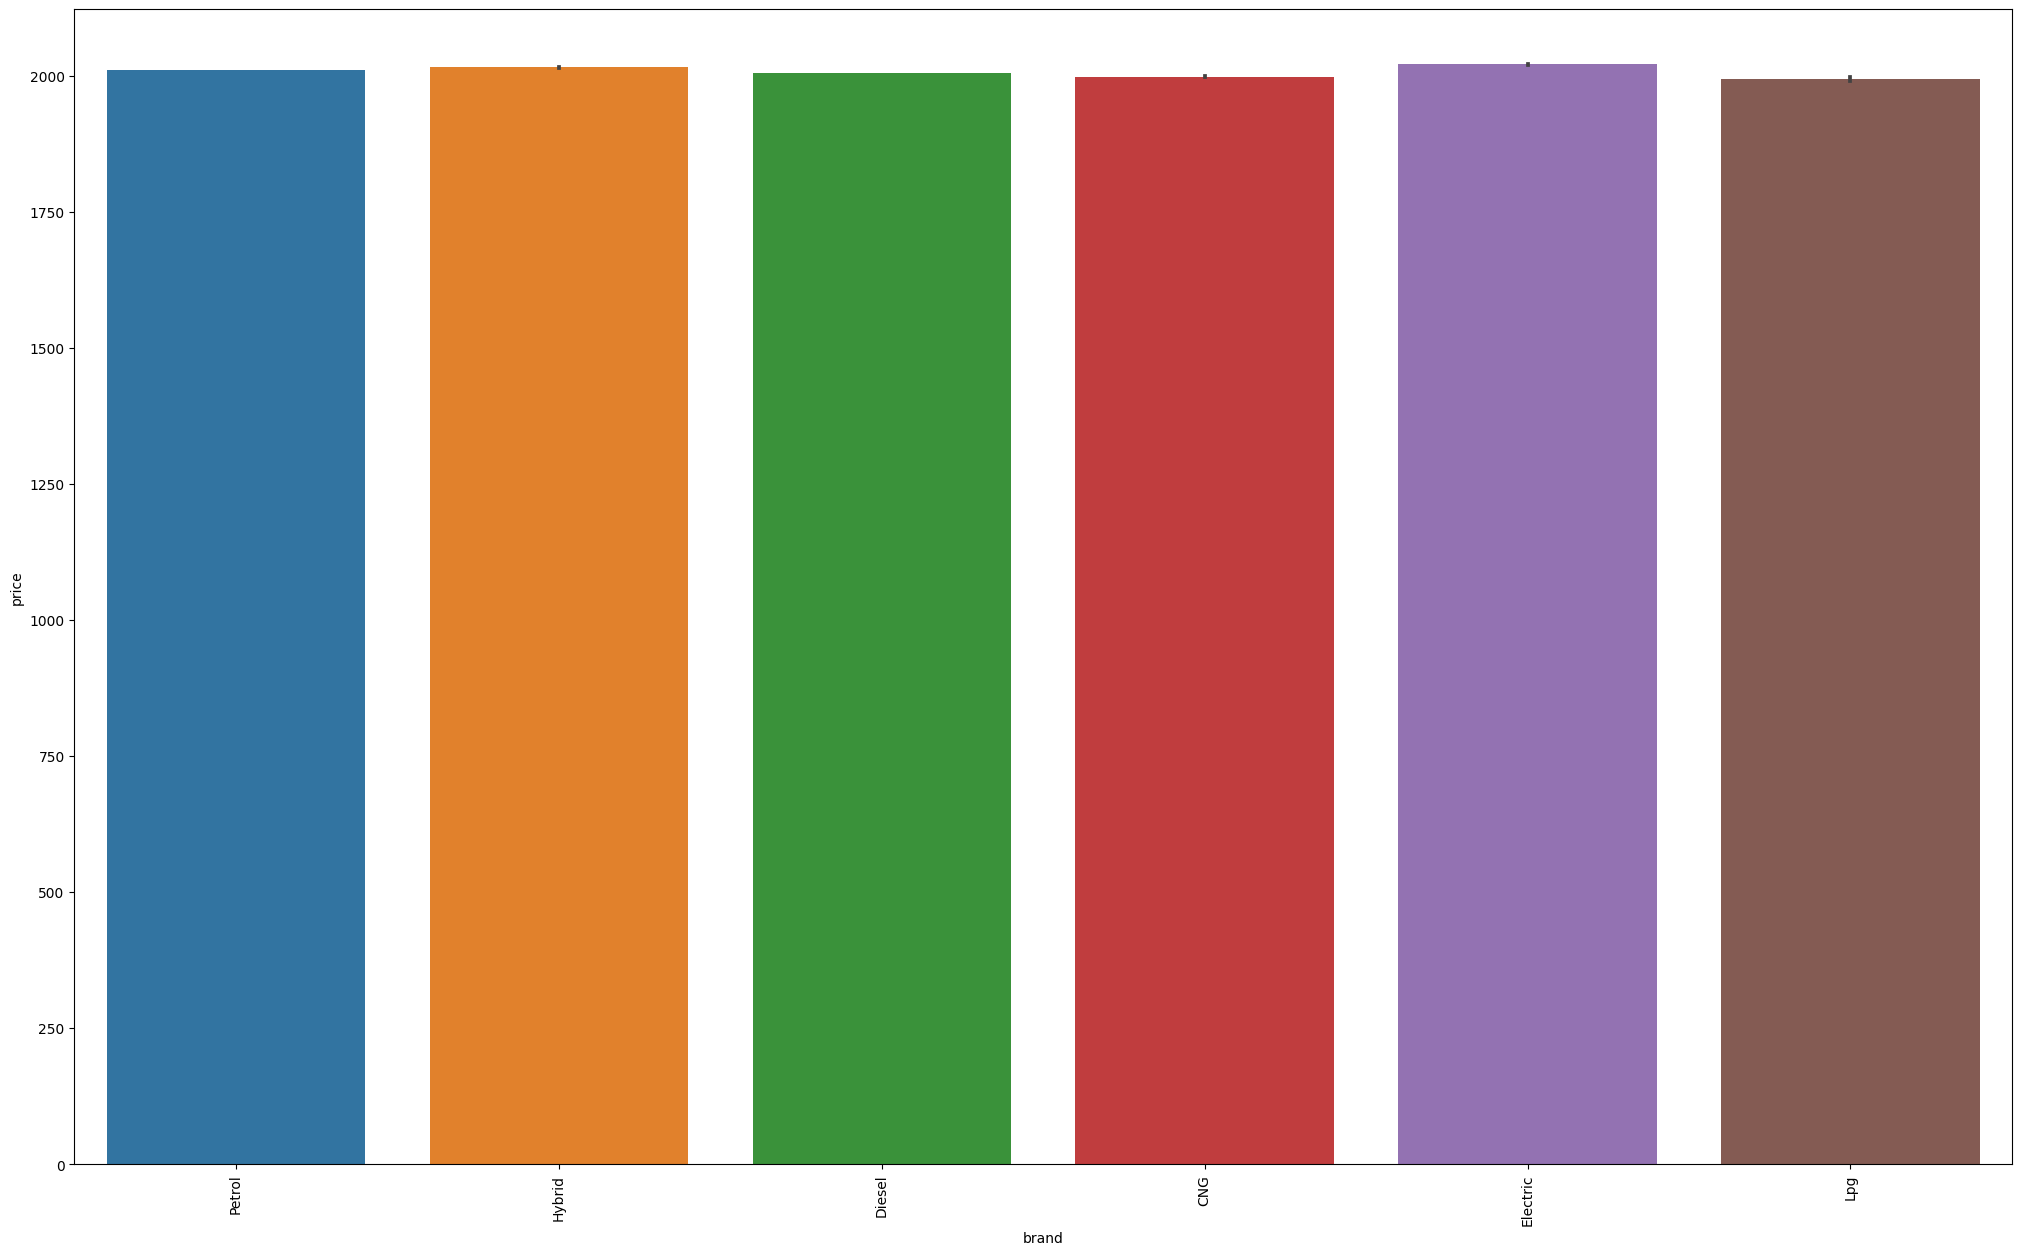

In [14]:
plt.figure(figsize=(25, 15))
sns.barplot(data=df, x='fuel_type', y='model_date')
plt.xticks(rotation=90)
plt.xlabel('brand')
plt.ylabel('price')
plt.show()
#conclusion cng is present  cng and lpg is present in old cars  and electric transmission is present in latest  cars

<AxesSubplot: xlabel='fuel_type'>

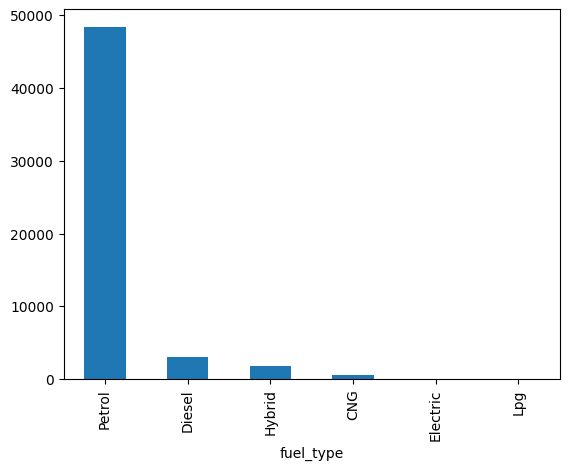

In [15]:
df['fuel_type'].value_counts().plot(kind='bar')
#conclusion majority of the cars have petrol transmission type

In [16]:
uppl=['mileage_from_odometer','price']
for i in uppl:
      q3=df[i].quantile(0.70)
      q1=df[i].quantile(0.30)
      iqr=q3-q1
      upl=q3+1.5*iqr
      limit=df[i]<upl
      df=df[limit]

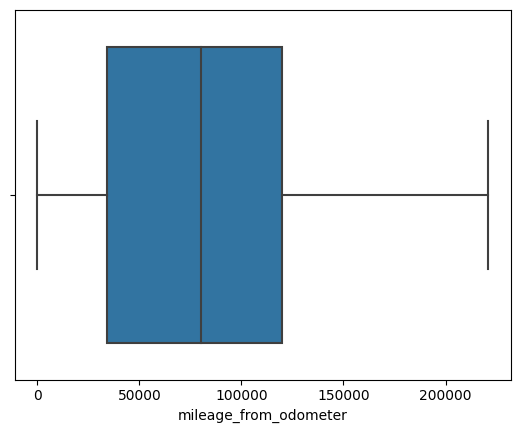

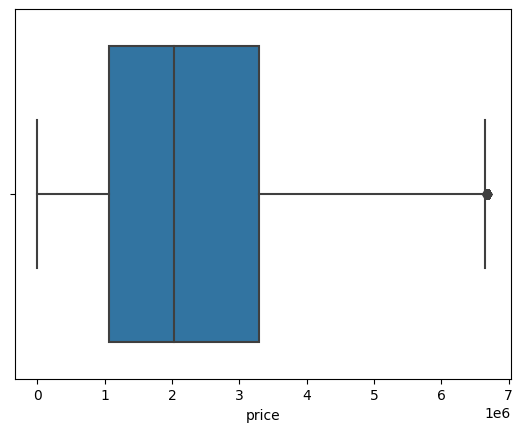

In [17]:
cols=['mileage_from_odometer','price']
for i in cols:
    sns.boxplot(data=df,x=i)
    plt.show()

In [18]:
df.describe()

,mileage_from_odometer,model_date,price
count,45758.000000,45758.000000,4.575800e+04
mean,81981.615149,2010.616832,2.347610e+06
std,56560.252698,9.361539,1.550117e+06
min,1.000000,1942.000000,1.780000e+03
25%,34000.000000,2006.000000,1.065000e+06
50%,80000.000000,2012.000000,2.030000e+06
75%,120000.000000,2018.000000,3.300000e+06
max,220974.000000,2023.000000,6.700000e+06


In [19]:
x=df.drop(['price'],axis=1)
y=df['price']
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.2,random_state=42)
xtr

,brand,fuel_type,item_condition,mileage_from_odometer,model_date,vehicle_transmission,model
45094,Toyota,Petrol,used,59500,2019,Automatic,Corolla
35335,Toyota,Diesel,used,1,1970,Manual,Crown
10759,Toyota,Petrol,used,10,2022,Automatic,Corolla
40953,Mitsubishi,Diesel,used,205000,1994,Automatic,Pajero
19106,Toyota,Petrol,used,135000,2013,Manual,Corolla
...,...,...,...,...,...,...,...
15985,Toyota,Petrol,used,57000,2010,Manual,Corolla
58825,Suzuki,Petrol,used,121000,2011,Manual,Swift
50761,Toyota,Petrol,used,145000,2010,Automatic,Vitz
1236,Daihatsu,Petrol,used,43242,2018,Automatic,Mira


In [21]:
ohe=OneHotEncoder()
ohe.fit(x[['brand','fuel_type','item_condition','vehicle_transmission','model']])
ohe.categories_
ct=ColumnTransformer([
    ('ohe',OneHotEncoder(sparse_output=False,drop='first',categories=ohe.categories_),[0,1,2,5,6])
],remainder='passthrough')
rf=RandomForestRegressor()

# Model Training

In [22]:
pipe=Pipeline([
    ('ct',ct),
    ('rf',rf)
])

In [23]:
pipe.fit(xtr,ytr)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories=[array(['Adam', 'Alfa Romeo', 'Audi', 'BAIC', 'BMW', 'Bentley', 'Buick',
       'Cadillac', 'Changan', 'Chery', 'Chevrolet', 'Citroen',
       'Classic Cars', 'DFSK', 'Daehan', 'Daewoo', 'Daihatsu', 'Datsun',
       'FAW', 'Ferrari', 'Fiat', 'Ford', 'Geely', 'Golf', 'Hino', 'Honda',
       'Hyun...
       'Thor', 'Tiggo', 'Tiida', 'Titan', 'Toppo', 'Town', 'Triton',
       'Trooper', 'Tucson', 'Uno', 'Up', 'V2', 'Vamos', 'Van', 'Vanguard',
       'Verossa', 'Vezel', 'Vigus', 'Vita', 'Vitara', 'Vitz', 'Voxy',
       'Wagon', 'Wingroad', 'Wish', 'Wrangler', 'X', 'X1', 'X200', 'X3',
       'X5', 'X70', 'Xbee', 'Xv', 'Yaris', 'Z100', 'ZS', 'Zest', 'iQ'],
      dtype=object)],
                                                                drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 6])])),
                ('rf', RandomForestRegressor())])

In [24]:
xtrpred=pipe.predict(xtr)
r2=r2_score(ytr,xtrpred)*100
print('r2 score of training data',r2)

r2 score of training data 98.35747997941282


In [25]:
print('mas of training data',mean_absolute_error(ytr,xtrpred))
print('mse of training data',mean_squared_error(ytr,xtrpred))
print('rmse of training data',np.sqrt(mean_squared_error(ytr,xtrpred)))

mas of training data 125656.98837438456
mse of training data 39584323628.6912
rmse of training data 198958.09515747582


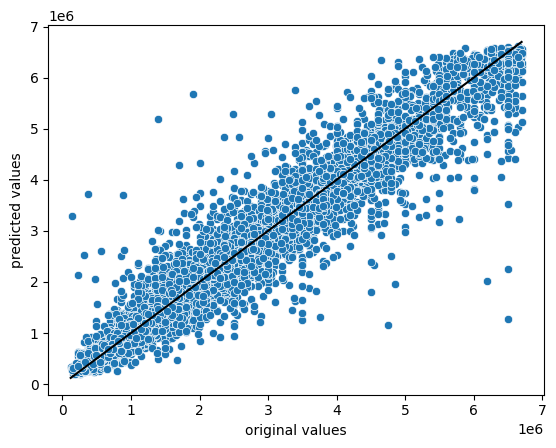

In [26]:
xtspred=pipe.predict(xts)
sns.scatterplot(x=yts,y=xtspred)
plt.xlabel('original values')
plt.ylabel('predicted values')
plt.plot([min(yts), max(yts)], [min(yts), max(yts)], linestyle='-', color='black')
plt.show()

In [27]:
r2s=r2_score(yts,xtspred)*100
print('r2 score of testing data',r2s)
print('mas of testing data',mean_absolute_error(yts,xtspred))
print('mse of testing data',mean_squared_error(yts,xtspred))
print('rmse of testing data',np.sqrt(mean_squared_error(yts,xtspred)))

r2 score of testing data 92.89191052691717
mas of testing data 260002.79409137607
mse of testing data 168742341427.88364
rmse of testing data 410782.5963059823
